![banner](https://github.com/semilleroCV/Hands-on-Computer-Vision/blob/main/sesiones/sesion3/banner.png?raw=1)


# 🖥️✨ **Librerias importantes de Visión por Computadora**  

🔹 **TorchVision** - Base principal para tareas de visión por computadora.  
📂 **torchvision.datasets** - Accede a conjuntos de datos y carga de datos para visión por computadora.  
🤖 **torchvision.models** - Modelos pre-entrenados listos para usar en tareas de visión por computadora.  
🎨 **torchvision.transforms** - Transformaciones para el procesamiento de imágenes.  
📦 **torch.utils.data.Dataset** - Clase base para crear conjuntos de datos en PyTorch.  
🔄 **torch.utils.data.DataLoader** - Crea un iterable en Python para recorrer un conjunto de datos.  


In [1]:
## @title Librerias importantes
import torch
from torch import nn
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [2]:
## @title Primer Modelo
import torch.nn as nn

class ModelCV(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features=input_shape, out_features=hidden_units)
        self.relu = nn.ReLU() # Funcion de activacion
        self.fc2 = nn.Linear(in_features=hidden_units, out_features=output_shape)

    def forward(self, x):
        # x = self.flatten(x)
        # x = self.fc1(x)
        # x = self.fc2(x)
        # return x
        return self.fc2(self.relu(self.fc1(self.flatten(x))))

In [3]:
model = ModelCV(input_shape=1, hidden_units=10, output_shape=1)
# model.state_dict()
model

ModelCV(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)

# 🎛️ Capas Convolucionales (Convolutional Layers)

🛠️ **Parámetros clave:**  
- 🏗️ **Tamaño del kernel:** Define la región de la imagen que analiza cada filtro.  
- ⚙️ **Stride (desplazamiento):** Determina cuánto se mueve el filtro en cada paso.  
- 🔲 **Padding:** Agrega píxeles alrededor de la imagen para mantener su tamaño.

https://poloclub.github.io/cnn-explainer/

In [4]:
# Cambia las partes que digan "FIXME"
class ModelCV2(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=0)
    self.relu1 = nn.ReLU() # cambialo si quieres
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(in_features=26*26*hidden_units, out_features=hidden_units)
    self.relu2 = nn.ReLU()
    self.fc2 = nn.Linear(in_features=hidden_units, out_features=output_shape)

  def forward(self, x):
    return self.fc2(self.relu2(self.fc1(self.flatten(self.relu1(self.conv1(x))))))

## 📂 Obteniendo un Dataset  

El dataset que utilizaremos es **Fashion MNIST**, proveniente de `torchvision.datasets`.  

🛍️ **Fashion MNIST** es una colección de imágenes en escala de grises que representa diferentes categorías de ropa y accesorios. Es una alternativa moderna al clásico **MNIST** de dígitos escritos a mano.  

📌 **Fuente:** `torchvision.datasets`  


In [5]:
#Training y Testing Data
train_data = datasets.FashionMNIST(root = "data",
                                   train=True, # train dataset
                                   download = True,
                                   transform = ToTensor(), # posibles transformaciones
                                   target_transform=None
                                   )

test_data = datasets.FashionMNIST(root="data",
                                  train=False,
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None
                                  )

100%|██████████| 26.4M/26.4M [00:01<00:00, 14.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 207kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.93MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.91MB/s]


In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

image shape: torch.Size([1, 28, 28])


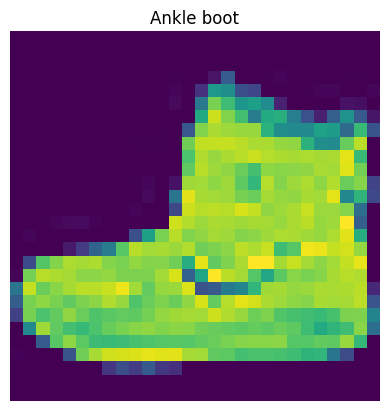

In [7]:
image, label = train_data[0] # Visualizacion
print(f"image shape: {image.shape}") # dimension de una imagen
plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.axis("off")
plt.show()

### 👀 Visualización del Dataset  

Para entender mejor los datos, vamos a visualizar algunas imágenes del **Fashion MNIST**.  

🎨 Vamos a graficar algunas muestras para observar su apariencia y distribución.  


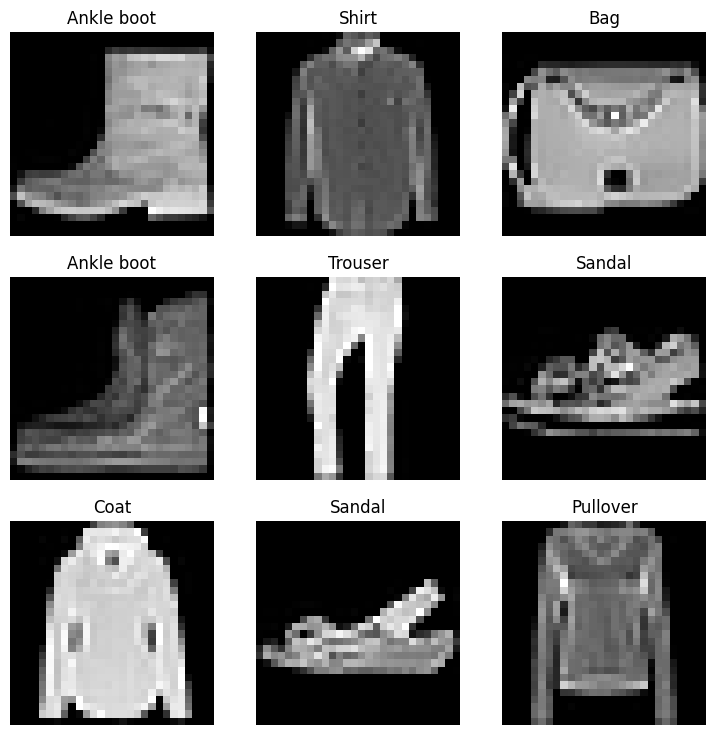

In [8]:
#VISUALIZE VISUALIZE VISUALIZE
torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))
rows, cols = 3, 3 # cuantas imagenes quieras ver...
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [9]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

### 🚂 TrainDataloader y TestDataloader  

Para entrenar y evaluar nuestro modelo, necesitamos **dataloaders** que nos ayuden a manejar los datos de manera eficiente.  

🔄 **TrainDataloader**:  
Se encarga de cargar los datos de entrenamiento en **lotes (batches)**, permitiendo el procesamiento en paralelo y la optimización del rendimiento.  

🧪 **TestDataloader**:  
Nos permite evaluar el modelo con datos de prueba para medir su precisión y rendimiento.  

📌 Estos dataloaders provienen de `torch.utils.data.DataLoader`, que facilita la iteración sobre los datasets de `torchvision.datasets`.  


In [10]:
BATCH_SIZE = 32 # Numero de imagenes por Batch

#turn datasets into iterables (batches)

train_dataloader = DataLoader(dataset = train_data,
                          batch_size = BATCH_SIZE,
                          shuffle=True)
test_dataloader = DataLoader(dataset = test_data,
                         batch_size = BATCH_SIZE,
                         shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7df00129a390>,
 <torch.utils.data.dataloader.DataLoader at 0x7df001417f50>)

In [11]:
# Veamos lo que acabamos de crear

print(f"DataLoaders: {train_dataloader,train_dataloader }")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7df00129a390>, <torch.utils.data.dataloader.DataLoader object at 0x7df00129a390>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [12]:
# veamos que hay dentro del traindataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [13]:
# img_prueba = torch.rand(size=(32,1,28,28))
# print(img_prueba.shape)
# labels_len = len(class_names)
# model = ModelCV2(input_shape=1, hidden_units=64, output_shape=labels_len)
# salida = model(img_prueba)

In [30]:
model = ModelCV2(input_shape=1, hidden_units=64, output_shape=len(class_names))
model

## 🎯 Elección de la Función de Pérdida y el Optimizador  

Para entrenar nuestra red neuronal, necesitamos definir:

📌 En PyTorch, podemos encontrar múltiples opciones en `torch.nn` (para la pérdida) y `torch.optim` (para el optimizador).  

In [25]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.01)

In [26]:
# Agnostic Code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [32]:
model.to(device)

ModelCV2(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=43264, out_features=64, bias=True)
  (relu2): ReLU()
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

In [33]:
# NO modifiques esta celda ♥
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

# 🚀 Entrenamiento del Modelo  

Ahora entrenaremos nuestra red neuronal para que aprenda a clasificar las imágenes del dataset.  

🔄 **Proceso de entrenamiento:**  
1️⃣ Se envían imágenes al modelo.  
2️⃣ El modelo realiza predicciones.  
3️⃣ Se calcula la **pérdida (loss)** comparando predicciones con etiquetas reales.  
4️⃣ Se ajustan los pesos con el **optimizador**.  
5️⃣ Se repite el proceso en varias **épocas (epochs)** hasta mejorar el desempeño.  


In [34]:
from tqdm.auto import tqdm
torch.manual_seed(42)
epochs = 1

for epoch in tqdm(range(epochs)):
  train_loss = 0
  train_acc = 0
  for batch, (X_train, y_train) in enumerate(train_dataloader):
    model.train()
    X_train, y_train = X_train.to(device), y_train.to(device)
    y_train_logits = model(X_train) #forward pass

    # calculamos la funcion de perdida
    loss = loss_fn(y_train_logits, y_train)
    train_loss += loss
    train_acc += accuracy_fn(y_true = y_train, y_pred = y_train_logits.argmax(dim=1))
    # optimizer zero grad
    optimizer.zero_grad()

    # retropropagacion
    loss.backward()
    # optimizer step step step
    optimizer.step()
  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)
  model.eval()
  with torch.no_grad():
    test_loss = 0
    test_acc = 0
    for X_test, y_test in test_dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      #forward pass
      y_test_logits = model(X_test)
      # calcular la loss
      test_loss += loss_fn(y_test_logits, y_test)
      test_acc += accuracy_fn(y_true = y_test, y_pred = y_test_logits.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  print(f"epoch: {epoch} | Train loss: {train_loss:.5f}, train acc: {train_acc:.2f} | Test loss: {test_loss:.5f}, test acc: {test_acc:.2f}")

  0%|          | 0/1 [00:00<?, ?it/s]

epoch: 0 | Train loss: 2.29994, train acc: 9.99 | Test loss: 2.29987, test acc: 10.01


# 📊 Evaluación del Modelo  

Después del entrenamiento, es momento de evaluar el desempeño de nuestra red neuronal.  

🛠️ **Proceso de evaluación:**  
1️⃣ Se usa el **TestDataloader** para pasar imágenes de prueba al modelo.  
2️⃣ Se comparan las predicciones con las etiquetas reales.  
3️⃣ Se calcula la **precisión (accuracy)** y otras métricas de rendimiento.  

📌 Esto nos ayuda a entender si el modelo **generaliza bien** o si necesita mejoras.  

In [40]:
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """ retorna un diccionario que contiene las predicciones del modelo"""
    loss, acc = 0, 0
    model.eval()

    with torch.no_grad():
      for X, y in tqdm(data_loader):
        X, y = X.to(device), y.to(device)
        #make predictions
        y_pred = model(X)

        # Accumulate the loss and acc values per batch

        loss += loss_fn(y_pred, y)
        acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))
      # scale the loss and acc to find the average loss and acc per batch

      loss /= len(data_loader)
      acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}
model_0_results = eval_model(model=model,
                             data_loader = test_dataloader,
                             loss_fn =  loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'ModelCV2',
 'model_loss': 2.2998738288879395,
 'model_acc': 10.013977635782748}

## 🎨 Visualización de las Predicciones del Modelo  

Para entender mejor el desempeño del modelo, vamos a **visualizar algunas predicciones**.  

📸 **Proceso:**  
1️⃣ Tomamos algunas imágenes del conjunto de prueba.  
2️⃣ El modelo genera una predicción para cada imagen.  
3️⃣ Comparamos la predicción con la etiqueta real.  
4️⃣ Mostramos las imágenes junto con sus etiquetas y predicciones.  

📌 Esto nos permite identificar posibles **errores** y mejorar el modelo si es necesario.  


In [42]:
# NO modifiques esta celda ♥
def make_predictions(model:torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.no_grad():
    for sample in data:
      #add a bacth dimension and pass to target device
      sample = torch.unsqueeze(sample, dim=0).to(device)

      pred_logit =  model(sample)

      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      #get pred_prob off the gpu
      pred_probs.append(pred_prob.cpu())

  #stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [43]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [44]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sneaker')

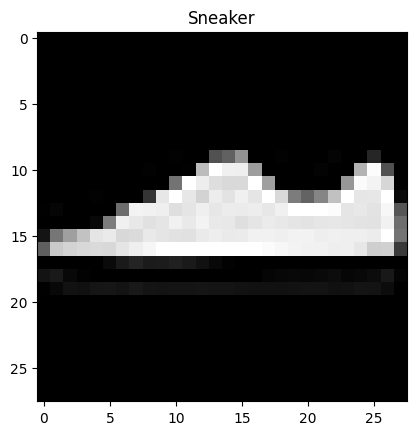

In [45]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [47]:
# Hacemos predicciones
pred_probs = make_predictions(model=model,
                              data=test_samples,
                              )
#miremos👀
pred_probs[:2]

tensor([[0.1011, 0.1019, 0.0903, 0.1009, 0.0940, 0.1122, 0.0886, 0.1019, 0.1077,
         0.1015],
        [0.1004, 0.0974, 0.0824, 0.0966, 0.0952, 0.1177, 0.0921, 0.1085, 0.1047,
         0.1050]])

In [48]:
# convertimos las probabilidades a clases
pred_class = pred_probs.argmax(dim=1)
pred_class, test_labels

(tensor([5, 5, 5, 5, 5, 5, 5, 5, 5]), [7, 9, 8, 1, 5, 3, 9, 4, 6])

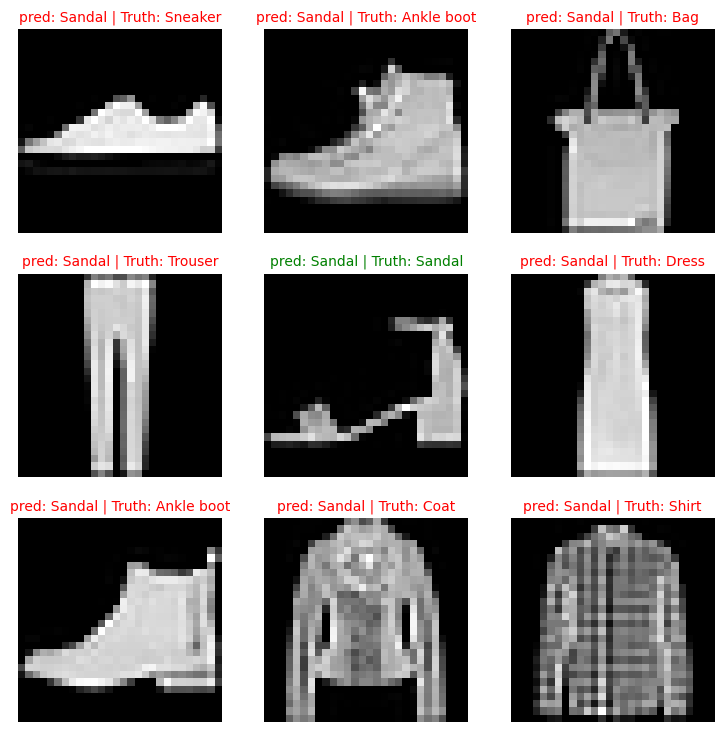

In [49]:
# NO modifiques esta celda ♥
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)

  #plot the target image
  plt.imshow(sample.squeeze(), cmap = "gray")

  #find the prediction label
  pred_label = class_names[pred_class[i]]

  #get the truth label
  truth_label = class_names[test_labels[i]]

  #create a tittle for the plot
  tittle_text = f"pred: {pred_label} | Truth: {truth_label}"
  if pred_label == truth_label:
    plt.title(tittle_text, fontsize=10,c="g")
  else:
    plt.title(tittle_text, fontsize=10,c="r")
  plt.axis(False)

## 🏗️ Implementación de TinyVGG  

Vamos a construir **TinyVGG**, una versión simplificada de **VGGNet**, ideal para tareas de clasificación de imágenes.  

⚙️ **Arquitectura de TinyVGG:**  
🔹 Capas convolucionales (`Conv2d`) para extraer características.  
🔹 Función de activación **ReLU** para introducir no linealidad.  
🔹 Capas de **MaxPooling** para reducir la dimensionalidad.  
🔹 Capas totalmente conectadas (`Linear`) para clasificar.  


In [50]:
#Test yourself try to replicate tinyvgg -> https://poloclub.github.io/cnn-explainer/
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    """
    Model Architecture that replicates the TinyVGG
    model from CNN explainer website
    """
    self.conv_blocl_1 = nn.Sequential(

    )
    self.conv_blocl_2 = nn.Sequential(

    )
    self.classifier = nn.Sequential(
    )

  def forward(self,x):
    x = self.conv_blocl_1(x)
    # print(x.shape)
    x = self.conv_blocl_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x

In [51]:
image.shape

torch.Size([1, 28, 28])

In [52]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [53]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, # canales de la imagen
                              hidden_units=10, # numero de filtros
                              output_shape=len(class_names)
                              ).to(device)
# model_2.state_dict()

### Loss function and optimizer

In [55]:
loss_fn = nn.CrossEntropyLoss() # <-- ¿Por qué este?
#cambialos si quieres
optimizer = torch.optim.SGD(params = model_2.parameters(), lr="fix") # < -- ¿Por qué este?

ValueError: optimizer got an empty parameter list

In [ ]:
# DO NOT change this
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

##Train fuction

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(42)
epochs = "FIXME"

for epoch in tqdm(range(epochs)):
  train_loss = 0
  train_acc = 0
  for batch, (X_train, y_train) in enumerate(train_dataloader):
    "FIXME".train()
    X_train, y_train = X_train.to(device), y_train.to(device)
    y_train_logits = "FIXME"("FIXME") #forward pass

    # calcula la loss
    loss = loss_fn(y_train_logits, y_train)
    train_loss += loss
    train_acc += accuracy_fn(y_true = y_train, y_pred = y_train_logits.argmax(dim=1))
    # optimizer zero grad
    "FIXME"
    # loss backward
    "FIXME"
    # optimizer step step step
    "FIXME"
  train_loss /= len(train_dataloader) # <- Why we should divide?
  train_acc /= len(train_dataloader)
  "FIXME".eval()
  with torch.no_grad():
    test_loss = 0
    test_acc = 0
    for X_test, y_test in test_dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      #do the forward pass
      y_test_logits = "FIXME"("FIXME")
      #calculate the loss
      test_loss += loss_fn(y_test_logits, y_test)
      test_acc += accuracy_fn(y_true = y_test, y_pred = y_test_logits.argmax(dim=1))
    test_loss /= len("FIXME")
    test_acc /= len("FIXME")
  print(f"epoch: {epoch} | Train loss: {train_loss:.5f}, train acc: {train_acc:.2f} | Test loss: {test_loss:.5f}, test acc: {test_acc:.2f}")

In [ ]:
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """ returns a dictionary containing the results of model predicting on data_loader"""
    loss, acc = 0, 0
    model.eval()

    with torch.no_grad():
      for X, y in tqdm(data_loader):
        #make predictions
        y_pred = model(X)

        # Accumulate the loss and acc values per batch

        loss += loss_fn(y_pred, y)
        acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))
      # scale the loss and acc to find the average loss and acc per batch

      loss /= len(data_loader)
      acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}
model_0_results = eval_model(model="FIXME",
                             data_loader = test_dataloader,
                             loss_fn =  loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

# 📋 Resumen del Modelo  

Después de construir nuestra red, es importante revisar su **estructura y cantidad de parámetros**.  

📌 **El resumen del modelo nos muestra:**  
🔹 Las capas de la red y sus dimensiones.  
🔹 La cantidad de parámetros entrenables.  
🔹 La conexión entre cada capa.  

✅ En `PyTorch`, podemos usar `print(model)` o `torchsummary.summary(model, input_size=(C, H, W))` para visualizarlo.  


In [ ]:
%%capture
! pip install torchinfo

In [ ]:
import torchinfo
torchinfo.summary("FIXME")